# Analysis for the Modeling Game

In [1]:
%matplotlib inline
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

import tellurium as te
import gene_network as gn
import modeling_game as mg
import model_fitting as mf
import gene_analyzer as ga
import util

## Analysis Codes

In [2]:
def evaluate(desc_stgs, **kwargs):
    analyzer = ga.GeneAnalyzer()
    for desc_stg in desc_stgs:
        analyzer.do(desc_stg, **kwargs)
        title = "%s: Rsq = %d%%" % (desc_stg, int(100*np.round(analyzer.rsq, 3)))
        plt.figure()
        analyzer.plot(title=title)
    return analyzer

## Explorations of Gene Structures

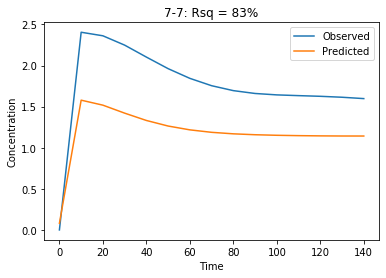

In [3]:
evaluate(["7-7"], max_iteration=20, end_time=150)

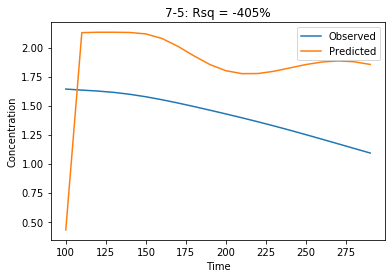

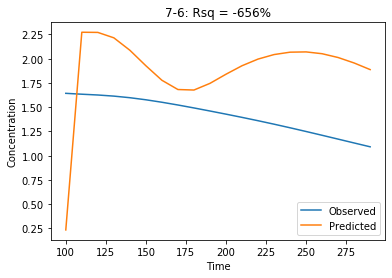

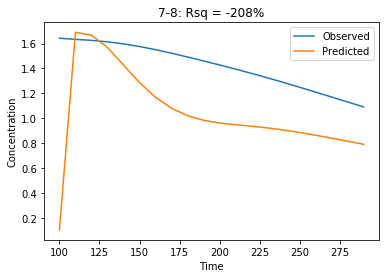

In [4]:
analyzer = evaluate(["7-5", "7-6", "7-8"], max_iteration=20, start_time=100, end_time=300)

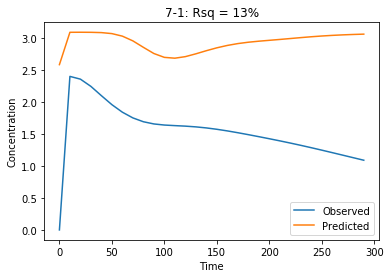

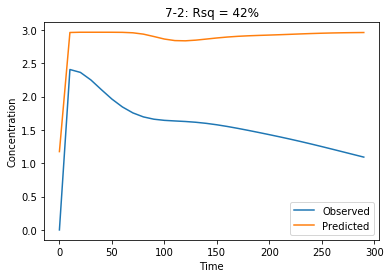

In [16]:
analyzer = evaluate(["7-1", "7-2"], max_iteration=20, start_time=0, end_time=300)

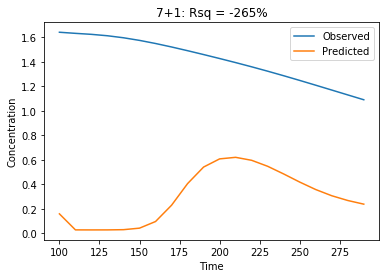

In [6]:
analyzer = evaluate(["7+1"], max_iteration=100, start_time=100, end_time=300)

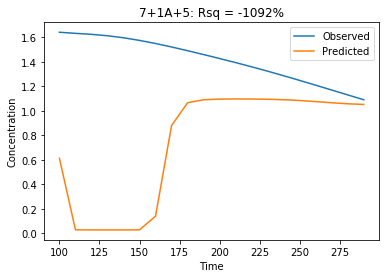

In [7]:
analyzer = evaluate(["7+1A+5"], max_iteration=20, start_time=100, end_time=300)

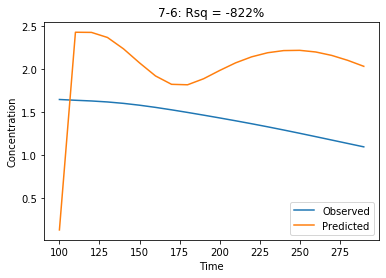

In [8]:
analyzer = evaluate(["7-6"], max_iteration=100, start_time=100, end_time=300)

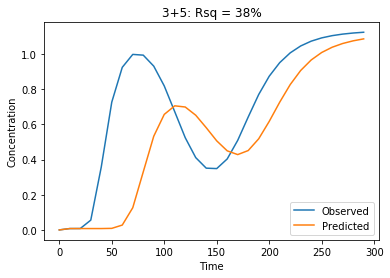

In [15]:
analyzer = evaluate(["3+5"], max_iteration=20, start_time=0, end_time=300)

In [10]:
#analyzer = evaluate(["5+3"], max_iteration=50, start_time=0, end_time=300)

In [11]:
#analyzer = evaluate(["7-7A-2"], max_iteration=200, start_time=0, end_time=1200)

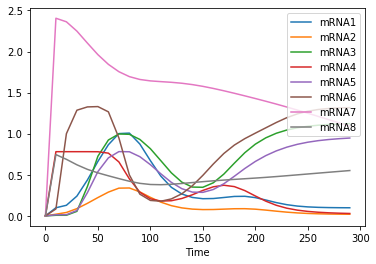

In [12]:
mg.plotData(analyzer._df_mrna, start_time=0, end_time=300)

In [13]:

ser_y = analyzer._df_mrna.loc[analyzer.times_est, "mRNA7"]
ser_res = ser_y - analyzer.arr_est
ser_res.var() / ser_y.var()

2.4598977379857057

In [14]:
STOP
evaluate(["7-7A-2", "7-7A-4", "7-7A-3", "7-7A-5", "7-7A-6", "7-7A-8"], max_iteration=100)
evaluate(["7-2", "7-4", "7-3", "7-5", "7-6", "7-8"], max_iteration=100)

NameError: name 'STOP' is not defined

In [ ]:
STOP
import cProfile
analyzer = ga.GeneAnalyzer()
cProfile.run('analyzer.do("7-7", end_time=100)')

## Correlation Analysis
The goal here is to gain intuition about possible TF configurations for genes.

1. Construct cross correlatons between mRNA and proteins at different time lags. Plt as heatmap.

In [20]:
df_mrna = pd.read_csv("wild.csv")
df_mrna = df_mrna.set_index("time")
df_mrna

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8
time,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10.0,0.099307,0.020844,0.007720,0.781444,0.013691,0.084857,2.404909,0.746052
20.0,0.129347,0.041853,0.007983,0.781449,0.014414,1.000481,2.361672,0.688322
30.0,0.241193,0.088704,0.055608,0.781449,0.065749,1.286064,2.248185,0.621902
40.0,0.436952,0.153115,0.357630,0.781445,0.282754,1.326094,2.102741,0.566512
...,...,...,...,...,...,...,...,...
1160.0,0.760921,0.254403,0.007757,0.515006,0.013873,0.054575,1.567315,0.346935
1170.0,0.762183,0.254814,0.007758,0.515392,0.013875,0.054699,1.589547,0.342784
1180.0,0.763440,0.255222,0.007758,0.515607,0.013877,0.054765,1.611597,0.338618


In [21]:
df_protein = pd.read_csv("wild_protein.csv")
df_protein = df_protein.set_index("time")
df_protein.head()

,P1,P2,P3,P4,P5,P6,P7,P8
time,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10.0,0.042008,0.008318,0.004338,0.315200,0.006857,0.035638,0.858853,0.370564
20.0,0.130453,0.032264,0.012270,0.866111,0.019399,0.483595,2.344076,1.021355
30.0,0.265368,0.080718,0.045898,1.314589,0.055920,1.340841,3.497636,1.531380
40.0,0.508303,0.168308,0.269464,1.679678,0.219301,2.188147,4.346492,1.919362


In [24]:
df_tot = pd.concat([df_mrna, df_protein], axis=1)
df_tot.loc[1200.0, :]

mRNA1    0.765516
mRNA2    0.255898
mRNA3    0.007759
mRNA4    0.515618
mRNA5    0.013880
mRNA6    0.054769
mRNA7    1.655170
mRNA8    0.330311
P1       4.319441
P2       2.093058
P3       0.056871
P4       2.158721
P5       0.082047
P6       0.271422
P7       5.729791
P8       2.859131
Name: 1200.0, dtype: float64

In [26]:
df_corr = df_tot.corr()
df_corr.head()

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8,P1,P2,P3,P4,P5,P6,P7,P8
mRNA1,1.000000,0.998619,-0.666416,0.751917,-0.671344,-0.631323,0.213343,-0.539854,0.837937,0.776217,-0.781441,0.935956,-0.770369,-0.681859,0.103489,-0.147532
mRNA2,0.998619,1.000000,-0.674501,0.763306,-0.680133,-0.629593,0.223155,-0.548680,0.836838,0.773927,-0.790280,0.945409,-0.780070,-0.689893,0.111368,-0.159306
mRNA3,-0.666416,-0.674501,1.000000,-0.800806,0.998027,0.848665,-0.153542,0.430474,-0.694888,-0.675261,0.915855,-0.742361,0.920789,0.969450,0.128525,0.170451
mRNA4,0.751917,0.763306,-0.800806,1.000000,-0.803244,-0.545193,0.377885,-0.315835,0.545201,0.510775,-0.883953,0.835263,-0.880831,-0.779082,0.024111,-0.276066
mRNA5,-0.671344,-0.680133,0.998027,-0.803244,1.000000,0.857334,-0.171799,0.442960,-0.698457,-0.677081,0.921819,-0.751456,0.928624,0.981337,0.112270,0.185288


In [29]:
columns = [c for c in df_corr.columns if "P" in c]
df_mp = df_corr[columns]
drop_rows = [r for r in df_corr.index if "P" in r]
df_mp = df_mp.drop(drop_rows)
df_mp.head()

,P1,P2,P3,P4,P5,P6,P7,P8
mRNA1,0.837937,0.776217,-0.781441,0.935956,-0.770369,-0.681859,0.103489,-0.147532
mRNA2,0.836838,0.773927,-0.790280,0.945409,-0.780070,-0.689893,0.111368,-0.159306
mRNA3,-0.694888,-0.675261,0.915855,-0.742361,0.920789,0.969450,0.128525,0.170451
mRNA4,0.545201,0.510775,-0.883953,0.835263,-0.880831,-0.779082,0.024111,-0.276066
mRNA5,-0.698457,-0.677081,0.921819,-0.751456,0.928624,0.981337,0.112270,0.185288


In [30]:
df_mp

,P1,P2,P3,P4,P5,P6,P7,P8
mRNA1,0.837937,0.776217,-0.781441,0.935956,-0.770369,-0.681859,0.103489,-0.147532
mRNA2,0.836838,0.773927,-0.790280,0.945409,-0.780070,-0.689893,0.111368,-0.159306
mRNA3,-0.694888,-0.675261,0.915855,-0.742361,0.920789,0.969450,0.128525,0.170451
mRNA4,0.545201,0.510775,-0.883953,0.835263,-0.880831,-0.779082,0.024111,-0.276066
mRNA5,-0.698457,-0.677081,0.921819,-0.751456,0.928624,0.981337,0.112270,0.185288
mRNA6,-0.684532,-0.638788,0.705414,-0.624192,0.714494,0.878458,0.221359,-0.055679
mRNA7,0.305153,0.352047,-0.426294,0.394010,-0.421484,-0.225525,0.787013,-0.871868
mRNA8,-0.741331,-0.770492,0.635281,-0.644720,0.626922,0.497077,-0.623001,0.713915


In [72]:
def correlate(df1, df2, lag=0):
    """
    Constructs the correlation with the specified lag
    for df2. Assumes that df1 and df2 have different columns.
    """
    def truncate(df, is_front=True):
        if is_front:
            df_trunc = df.loc[df.index[lag:], :]
        else:
            if lag == 0:
                df_trunc = df
            else:
                df_trunc = df.loc[df.index[:-lag], :]
        df_trunc.index = range(len(df_trunc))
        return df_trunc
    # Adjust lengths
    indices = range(len(df1) - lag)
    df1_trunc = truncate(df1, is_front=False)
    df2_trunc = truncate(df2, is_front=True)
    df_tot = pd.concat([df1_trunc, df2_trunc], axis=1)
    # Correlate and select columns
    df_corr = df_tot.corr()
    columns2 = df2.columns
    df_result = df_corr[columns2].copy()
    df_result = df_result.drop(columns2)
    return df_result

In [74]:
correlate(df_protein, df_mrna, lag=0)

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8
P1,0.837937,0.836838,-0.694888,0.545201,-0.698457,-0.684532,0.305153,-0.741331
P2,0.776217,0.773927,-0.675261,0.510775,-0.677081,-0.638788,0.352047,-0.770492
P3,-0.781441,-0.790280,0.915855,-0.883953,0.921819,0.705414,-0.426294,0.635281
P4,0.935956,0.945409,-0.742361,0.835263,-0.751456,-0.624192,0.394010,-0.644720
P5,-0.770369,-0.780070,0.920789,-0.880831,0.928624,0.714494,-0.421484,0.626922
P6,-0.681859,-0.689893,0.969450,-0.779082,0.981337,0.878458,-0.225525,0.497077
P7,0.103489,0.111368,0.128525,0.024111,0.112270,0.221359,0.787013,-0.623001
P8,-0.147532,-0.159306,0.170451,-0.276066,0.185288,-0.055679,-0.871868,0.713915


In [78]:
correlate(df_protein, df_mrna, lag=10)

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8
P1,0.445472,0.435448,-0.499752,0.453025,-0.500610,-0.354123,0.646799,-0.736223
P2,0.425270,0.411468,-0.455230,0.411754,-0.452134,-0.310014,0.663434,-0.730685
P3,-0.704825,-0.710682,0.663235,-0.632962,0.666445,0.534049,-0.799482,0.957301
P4,0.543170,0.547536,-0.539320,0.486004,-0.543053,-0.348586,0.734038,-0.893611
P5,-0.709778,-0.716558,0.672206,-0.651150,0.674373,0.530924,-0.790501,0.949271
P6,-0.764212,-0.769232,0.807198,-0.770822,0.810091,0.680671,-0.613050,0.815776
P7,-0.413343,-0.407527,0.516495,-0.412358,0.520734,0.708789,0.502217,-0.207334
P8,0.206859,0.193363,-0.302854,0.258998,-0.290164,-0.345212,-0.810615,0.514303


In [79]:
correlate(df_protein, df_mrna, lag=20)

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8
P1,0.296695,0.278213,-0.275813,0.243943,-0.264354,-0.179210,0.724347,-0.630500
P2,0.255135,0.235956,-0.230232,0.197189,-0.218952,-0.154074,0.711958,-0.597564
P3,-0.316033,-0.312095,0.232226,-0.233985,0.231975,0.054169,-0.976287,0.879713
P4,0.203637,0.189913,-0.152249,0.147638,-0.140280,0.007024,0.831207,-0.699981
P5,-0.340193,-0.336514,0.235489,-0.244653,0.233795,0.049981,-0.970182,0.889798
P6,-0.602329,-0.601723,0.489176,-0.526309,0.482280,0.272751,-0.876116,0.931073
P7,-0.639175,-0.649170,0.804604,-0.742097,0.823282,0.816526,-0.045178,0.330204
P8,0.542739,0.534881,-0.708939,0.599493,-0.703531,-0.791356,-0.369162,0.005703


In [80]:
correlate(df_protein, df_mrna, lag=30)

,mRNA1,mRNA2,mRNA3,mRNA4,mRNA5,mRNA6,mRNA7,mRNA8
P1,0.065473,0.055266,-0.023145,0.015391,-0.019391,-0.006759,0.584421,-0.390194
P2,-0.006562,-0.016461,0.038107,-0.053101,0.037501,0.011712,0.511803,-0.303922
P3,0.042056,0.057179,-0.174061,0.142391,-0.186190,-0.298872,-0.777556,0.500800
P4,-0.039367,-0.053348,0.156780,-0.132721,0.166018,0.223049,0.634087,-0.388518
P5,0.041393,0.056960,-0.179458,0.150963,-0.191191,-0.298856,-0.785657,0.513453
P6,-0.240946,-0.225390,0.072767,-0.082223,0.059181,-0.060719,-0.890814,0.748980
P7,-0.736767,-0.735477,0.827397,-0.771166,0.823301,0.700395,-0.573784,0.737051
P8,0.731183,0.731515,-0.889612,0.792518,-0.896905,-0.923486,0.251657,-0.507716
